In [ ]:
import pandas as pd
dataset = pd.read_csv('AAPL.csv',index_col='Date')
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-01,148.210007,149.130005,146.610001,148.309998,147.485641,71250400
2022-12-02,145.960007,148.000000,145.649994,147.809998,146.988419,65447400
2022-12-05,147.770004,150.919998,145.770004,146.630005,145.814972,68826400
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.115646,64727200
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.156601,69721100


In [ ]:
dataset.count()

Open         251
High         251
Low          251
Close        251
Adj Close    251
Volume       251
dtype: int64

In [ ]:
dataset = dataset.drop('Volume',axis='columns')

<Axes: xlabel='Date'>

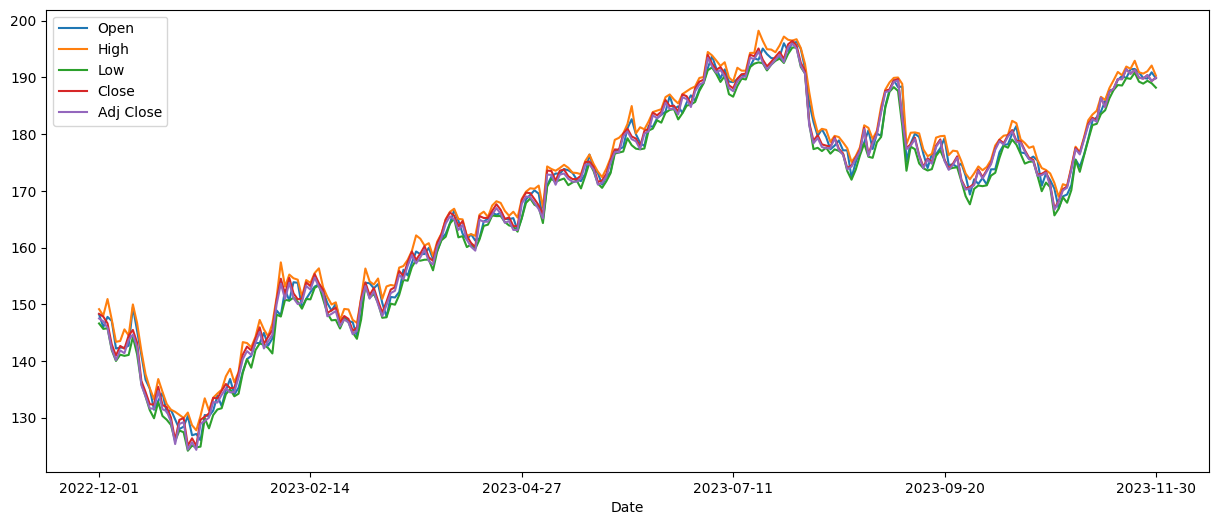

In [ ]:
dataset.plot(figsize=(15,6))

In [ ]:
train_dataset = dataset.iloc[:-11]
test_dataset = dataset.iloc[-11:]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(train_dataset)
standardized = scaler.transform(train_dataset)

In [ ]:
trainX = []
trainY = []

for i in range(10, len(standardized)):
    trainX.append(standardized[i - 10:i, 0:standardized.shape[1]])
    trainY.append(standardized[i:i + 1, 0])

In [ ]:
import numpy as np

In [ ]:
trainx, trainy = np.array(trainX), np.array(trainY)

print(format(trainx.shape))
print(format(trainy.shape))

(230, 10, 5)
(230, 1)


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(LSTM(60, input_shape=(10, 5)))
model.add(Dropout(0.2))
model.add(Dense(1))

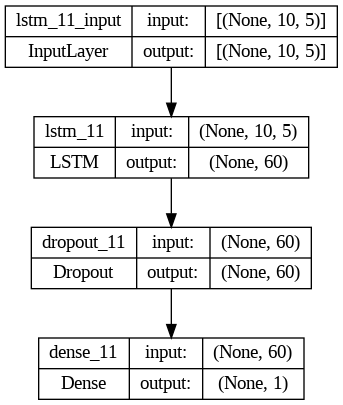

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(trainx, trainy, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
7/7 [==============================] - 7s 213ms/step - loss: 0.5284 - val_loss: 0.0904
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.1004 - val_loss: 0.1086
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.1157 - val_loss: 0.1012
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0783 - val_loss: 0.0653
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0660 - val_loss: 0.0592
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0641 - val_loss: 0.0573
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0584 - val_loss: 0.0582
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0459 - val_loss: 0.0544
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0500 - val_loss: 0.0502
Epoch 10/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0376 - val_loss: 0.0459
Epoch 11/100
7/7 [

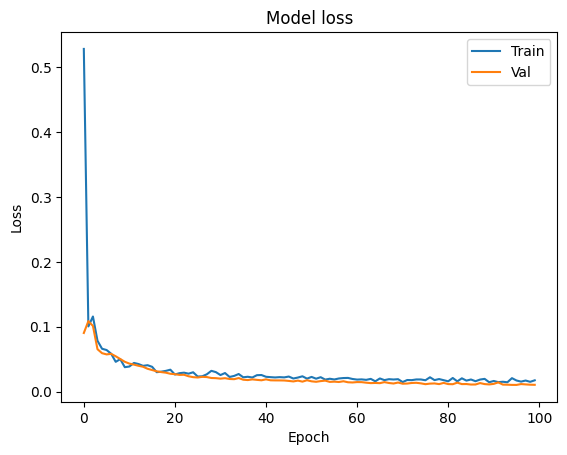

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
test_standardized = scaler.transform(test_dataset)

In [ ]:
testX = []
testY = []

testX.append(test_standardized[0:10, 0:test_dataset.shape[1]])
testY.append(test_standardized[10:11, 0])
testX, testY = np.array(testX), np.array(testY)

In [ ]:
print(testX.shape)
print(testY.shape)

(1, 10, 5)
(1, 1)


In [ ]:
prediction = model.predict(testX)
print('predicted value:{}, real:{}'.format(prediction[0][0],testY[0][0]))


1/1 [==============================] - 0s 412ms/step
predicted value:1.2493243217468262, real:1.2655956916119728


In [ ]:
res = np.array([[prediction[0][0], 0, 0, 0, 0]])
res_inversed = scaler.inverse_transform(res)
print('predicted value:{}, real:{}'.format(res_inversed[0][0],test_dataset['Open'][10]))

predicted value:189.54215211729996, real:189.839996
